## Boosting

Boosting is an ensemble learning method which combines multiple learners to obtain a more accurate model. The boosting model involves fitting an intial and then fitting subsequent models on the errors of that model. This process can be repeated as desired on additional subsequent residuals of boosted models. The graphic below describes the process visually. The boosting ENSEMBLE process works differently than that of the bagging model described elsewhere in this folder in that models are applied in sequence rather than in parallel to obtain a more accurate prediction.

<p align="center">
    <img src="Boosting.png" width="500">
</p>

 Below we will explore a model that has been boosted both for classification and regression.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.random.seed(99)

df = pd.read_csv("2015.csv")
X = df[["Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"]]
df.replace("Eastern Asia", "Asia", inplace = True)
df.replace("Southeastern Asia", "Asia", inplace = True)
df.replace("Southern Asia", "Asia", inplace = True)
df.replace("North America", "NA-WE-ASNZ", inplace = True)
df.replace("Western Europe", "NA-WE-ASNZ", inplace = True)
df.replace("Australia and New Zealand", "NA-WE-ASNZ", inplace = True)
feature_names = list(X.columns)
y = df[["Region"]]

The data to be used for classification consists of happiness scores with economy satisfaction, family satisfaction, life expectancy, freedom, govenrmental trust, and generosity components. These are all in the form of continuous values. Additionally, for the purpose of clustering, I am using the region as a categorical response label. I have modified the regions from their original reporting as obtained via Kaggle in order to make more even the size of distinct class labels. With this being said, there are still more sub-saharan african nations than any other group. For comparison, it is the same data used in the KNN example and Decision Tree examples.

In [8]:
from sklearn.model_selection import train_test_split
X = X.values
y= y.values
regions, y = np.unique(y, return_inverse=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, random_state=99), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)

ada.fit(X_train, y_train)
y_hat = ada.predict(X_test)

The model for this example is boosted using the ADA boost method. The ADA boost method works by assigning weight to each misclassified point and then regressing to minimize the new weighted problem. In this way the decision of the ADA boost decision tree model are distinct from those of the decision tree model despite being made up of decision trees. In the case of this model there are 10 decision trees applied in sequence each with a maximum depth of 5.

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      0.57      0.53         7
           2       0.50      0.40      0.44         5
           3       0.00      0.00      0.00         5
           4       1.00      0.88      0.93         8
           5       0.82      0.90      0.86        10

    accuracy                           0.65        40
   macro avg       0.60      0.59      0.59        40
weighted avg       0.65      0.65      0.65        40



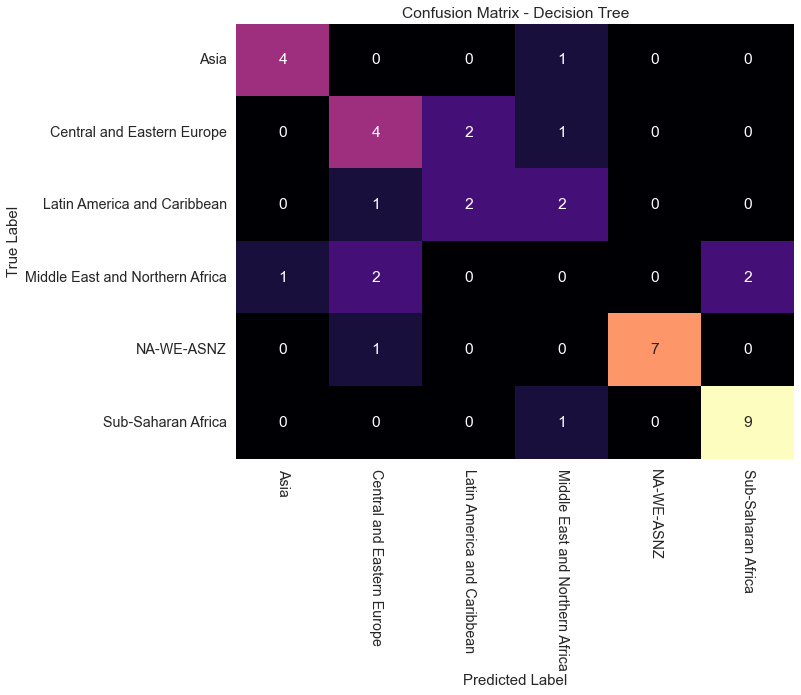

In [10]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_hat)

matrix_df = pd.DataFrame(confusion_matrix)
print(metrics.classification_report(y_test, ada.predict(X_test)))

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(regions, rotation = 270)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(regions, rotation=0)
plt.show()

The results of the ADA boost model are similar to that of the decision tree but not identical, as we would expect. The results are also distinct from thos of the Bagging model. The ADA boost model has identical accuracy to that of the decision tree model on the testing data but with a decreased accuracy prediction for Sub-Saharan Africa and increased predicition accuracy for Asia and North America/Western Europe/Australia New Zealand. This is likely due to an exchange in which points are most valuable to accurately classify as set by the boosting algorithm.

## Gradient Boosting

Another method of boosting includes gradient boosting. In a gradient boosted model, regression is performed on the errors of a previous model. Below is an implementation with three decision regression tree models each performed subsequently on difference $X_{i+1} = Err_i = y - \hat{y}_{\text{model i}}$ for each model. Note that $X_{i+1}$ is just the predictor for model $i+1$ and $\hat{y}_i$ is the sum of all $\hat{y}_i$ up through model $i$. 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
sal_by_college = pd.read_csv("salaries-by-college-type.csv")
sal_by_region = pd.read_csv("salaries-by-region.csv")
sal_by_degree = pd.read_csv("degrees-that-pay-back.csv")

To explore gradient boosting, we will use the data sets including salary information by salary type and salary region. The predictord consists of two variables, college type and college region and the regression value is the median starting salary. 

In [14]:
#print(sal_by_region.head)
#print(sal_by_college.head)
sal_complete  = sal_by_college.merge(sal_by_region, on="School Name")
#print(sal_complete.head)
df = sal_complete[["School Name", "School Type", "Region", "Starting Median Salary_x"]]
names = df[["School Name"]].values
X = df[["School Type", "Region"]].apply(lambda x: pd.factorize(x)[0]).values
y = df["Starting Median Salary_x"].str.replace(r"\D", "").astype("float").values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

C:\Users\awhit\AppData\Local\Temp\ipykernel_31292\2618506001.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  y = df["Starting Median Salary_x"].str.replace(r"\D", "").astype("float").values


Here I join the seperately imported pandas dataframes into one dataframe using a left join. 

In [23]:
from sklearn.tree import DecisionTreeRegressor


RegTree1 = DecisionTreeRegressor(max_depth=1, random_state=99)
RegTree1.fit(X_train, y_train)

y_train_err = y_train - RegTree1.predict(X_train)

RegTree2 = DecisionTreeRegressor(max_depth=1, random_state=99)
RegTree2.fit(X_train, y_train_err)

y_train_err2 = y_train_err- RegTree2.predict(X_train)

RegTree3 = DecisionTreeRegressor(max_depth=1, random_state=99)
RegTree3.fit(X_train, y_train_err2)


DecisionTreeRegressor(max_depth=1, random_state=99)

Each of the three models used for gradient boosting is a decision regression tree with depth 1.

MSE Model 1:  508348.9343740591
MSE Model 2:  480651.5464282655
MSE Model 3:  438387.97518128925


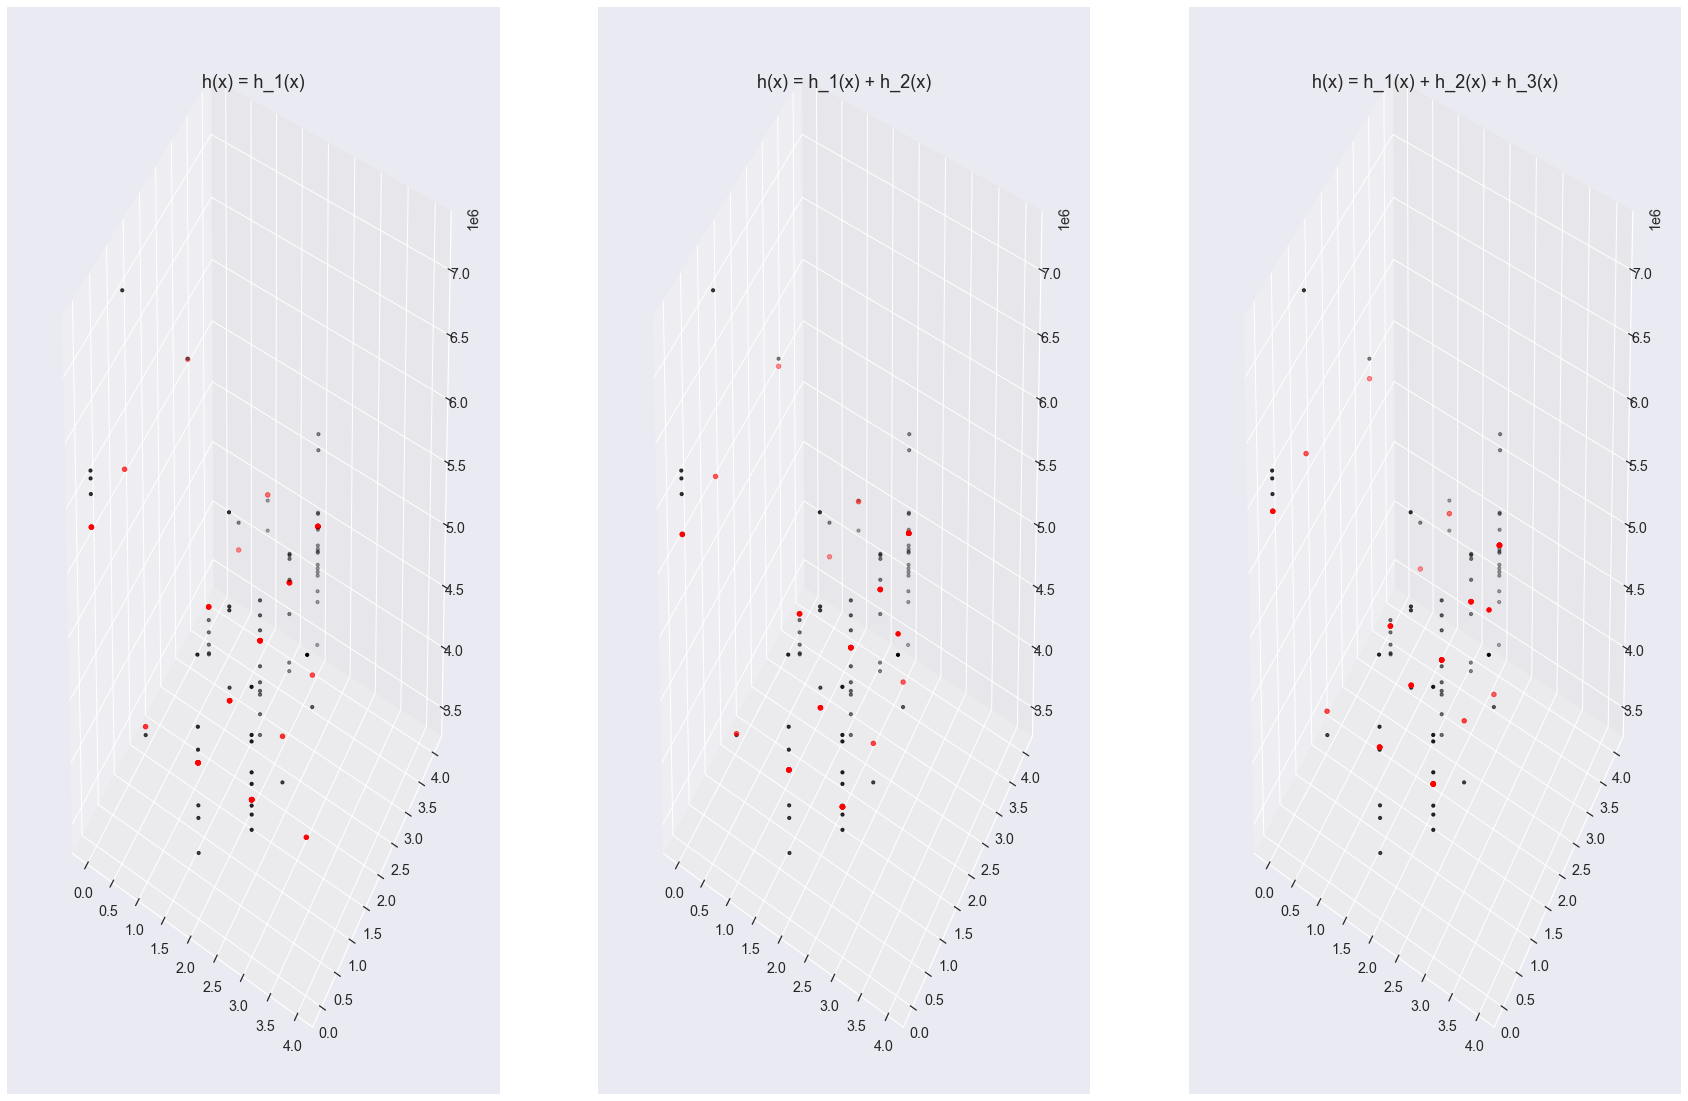

In [24]:
from sklearn.metrics import mean_squared_error

X_test0  = np.asarray([x[0] for x in X_test])
X_test1 = np.asarray([x[1] for x in X_test])
y_test = np.asarray(y_test)
print("RMSE Model 1: ", mean_squared_error(y_test, RegTree1.predict(X_test))**.5)
print("RMSE Model 2: ", mean_squared_error(y_test, RegTree1.predict(X_test)+RegTree2.predict(X_test))**.5)
print("RMSE Model 3: ", mean_squared_error(y_test, RegTree1.predict(X_test)+RegTree2.predict(X_test)+RegTree3.predict(X_test))**.5)

fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

ax1.scatter3D(X_test0, X_test1, y_test,  s=10, color = "black")
ax1.scatter3D(X_test0, X_test1,  RegTree1.predict(X_test), color = "red")
ax1.set_title("h(x) = h_1(x)", fontsize = 18)

ax2.scatter3D(X_test0, X_test1, y_test,  s=10, color = "black")
ax2.scatter3D(X_test0, X_test1, RegTree1.predict(X_test)+RegTree2.predict(X_test), color = "red")
ax2.set_title("h(x) = h_1(x) + h_2(x)", fontsize = 18)

ax3.scatter3D(X_test0, X_test1, y_test,  s=10, color = "black")
ax3.scatter3D(X_test0, X_test1, RegTree1.predict(X_test)+RegTree2.predict(X_test)+RegTree3.predict(X_test), color = "red")
ax3.set_title("h(x) = h_1(x) + h_2(x) + h_3(x)", fontsize = 18)
plt.show()

The boosting model does appear to improve the accuracy of the decision regression model, reducing the root mean squared error $(\sum_{i=1}^n (y_i - \hat{y}_i)^2)^.5$ from $\sim 50,000$ to $\sim 43,000$. It seems that this error may be inflated by lower maximum salaries for the set of training schools than the set of testing schools. It appears that the regression tree model is not very robust to the outliers within the dataset probably due to the poor generalizability of decision tree models. This is supported by the fact that the regression appears to be far closer at values for which there are a number of replicates. 